In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

##**Задание**


---
##**Task**


Вернемся к [набору данных о видеоиграх](https://github.com/DurinPavel/critics_and_video_games/blob/main/vgsales.csv).  
Ответьте на следующие вопросы:  
1. Как критики относятся к спортивным играм?  
2. Критикам нравятся больше игры на PC или на PS4?  
3. Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:  
- сформулируйте нулевую и альтернативную гипотезы;  
- выберите пороговый уровень статистической значимости;  
- опишите полученные результаты статистического теста.


---
Back to the [video game dataset](https://github.com/DurinPavel/critics_and_video_games/blob/main/vgsales.csv).  
Answer the following questions:
1. How do critics feel about sports games?  
2. Do critics like PC or PS4 games more?  
3. Do critics like shooting games or strategies more?

For each question:  
- formulate null and alternative hypotheses;  
- select a threshold level of statistical significance;  
- describe the results of the statistical test.


In [3]:
# Загрузим только интересующие нас данные и, для удобства, переименуем столбцы:
# -----------------------------------------------------------------------------
# We will load only the data we are interested in and, for convenience, rename
# the columns:

df = pd.read_csv('/content/drive/MyDrive/Файлы для домашних заданий/vgsales.csv',
                 header=0,
                 usecols=[0, 1, 3, 10, 11],
                 names=['Название', 'Платформа', 'Жанр', 'Оценка критиков',
                        'Количество критиков'])
df.head()

,Название,Платформа,Жанр,Оценка критиков,Количество критиков
0,Wii Sports,Wii,Sports,76.0,51.0
1,Super Mario Bros.,NES,Platform,NaN,NaN
2,Mario Kart Wii,Wii,Racing,82.0,73.0
3,Wii Sports Resort,Wii,Sports,80.0,73.0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,NaN,NaN


###**Подготовка дадасета**


---
###**Preparing a dataset**


In [4]:
# Посмотрим на наши данные. Мы видим, что в графах "Оценка критиков" и
# "Количество критиков" имеются пропуски:
# ----------------------------------------------------------------------------
# Let's look at our data. We see that in the columns "Critics' assessment" and
# "Number of critics" there are omissions:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Название             16717 non-null  object 
 1   Платформа            16719 non-null  object 
 2   Жанр                 16717 non-null  object 
 3   Оценка критиков      8137 non-null   float64
 4   Количество критиков  8137 non-null   float64
dtypes: float64(2), object(3)
memory usage: 653.2+ KB


In [5]:
# Удалим строки с пропусками, т.к. для наших целей они не имеют значения:
# ----------------------------------------------------------------------------
# We will delete the lines with omissions, because for our purposes they
# do not matter:

df = df.dropna()

In [6]:
# Посмотрим, что получилось. Видим, что имеем корректный датасет:
# ----------------------------------------------------------------------------
# Let's see what happened. We see that we have a correct dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8137 entries, 0 to 16709
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Название             8137 non-null   object 
 1   Платформа            8137 non-null   object 
 2   Жанр                 8137 non-null   object 
 3   Оценка критиков      8137 non-null   float64
 4   Количество критиков  8137 non-null   float64
dtypes: float64(2), object(3)
memory usage: 381.4+ KB


In [7]:
# Добавим в наш датасет графу "Средняя оценка":
# ----------------------------------------------------------------------------
# Let's add the "Average score" column to our dataset:

df['Средняя оценка'] = (
    (df['Оценка критиков'] / df['Количество критиков'])
    .round(1)
    )
df.head()

,Название,Платформа,Жанр,Оценка критиков,Количество критиков,Средняя оценка
0,Wii Sports,Wii,Sports,76.0,51.0,1.5
2,Mario Kart Wii,Wii,Racing,82.0,73.0,1.1
3,Wii Sports Resort,Wii,Sports,80.0,73.0,1.1
6,New Super Mario Bros.,DS,Platform,89.0,65.0,1.4
7,Wii Play,Wii,Misc,58.0,41.0,1.4


###**Как критики относятся к спортивным играм?**


---
###**How do critics feel about sports games?**


In [8]:
# Посмотрим на среднюю оценку, выставляемую критиками спортивным играм:
# ----------------------------------------------------------------------------
# Let's look at the average rating given by critics to sports games:

df.loc[(df['Жанр'] == 'Sports'), ['Средняя оценка']].mean().round(1)

Средняя оценка    5.1
dtype: float64

In [9]:
# Посмотрим на среднюю оценку, выставляемую критиками по всем жанрам игр:
# ----------------------------------------------------------------------------
# Let's look at the average rating given by critics for all genres of games:

df['Средняя оценка'].mean().round(1)

4.4

**Сформулируем наши гипотезы:**  
**H0:** среднее значение оценки, выставляемой критиками  
спортивным играм, равно средней оценке по всем жанрам игр.  
**H1:** среднее значение оценки, выставляемой критиками  
спортивным играм, отличается от средней оценки по всем жанрам игр.


---
**Let's formulate our hypotheses:**  
**H0:** the average score given by critics  
to sports games is equal to the average score for all genres of games.  
**H1:** the average score given by critics  
to sports games differs from the average score for all genres of games.


In [10]:
# Проведем одновыборочный T-тест. Сравним значение средней оценки, выставляемой
# критиками спортивным играм, со средним значением выставляемых критиками
# оценок по всем жанрам игр.
# Примем пороговый уровень статистической значимости равный 0.05.
# ----------------------------------------------------------------------------
# Let's conduct a single-sample T-test. Let's compare the value of the average
# rating given critically acclaimed sports games, with the average value exposed
# by critics ratings for all genres of games.
# Let's assume a threshold level of statistical significance equal to 0.05.

stat, p_value = stats.ttest_1samp(
    (df.loc[(df['Жанр'] == 'Sports'), ['Средняя оценка']]),
    df['Средняя оценка'].mean()
    )
print('Статистика = %.2f, p_value = %.3f.' % (stat, p_value))

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу. Вероятно, выставляемая критиками '
          'средняя оценка' '\n' 'спортивным играм, равна средней оценке по всем '
          'жанрам игр.')
else:
    print('Отклоняем нулевую гипотезу. Вероятно, среднее значение оценки, '
          'выставляемой' '\n' 'критиками спортивным играм, отличается от '
          'средней оценки по всем жанрам игр.')

Статистика = 7.53, p_value = 0.000.
Отклоняем нулевую гипотезу. Вероятно, среднее значение оценки, выставляемой
критиками спортивным играм, отличается от средней оценки по всем жанрам игр.


*Результаты теста говорят нам, что средняя оценка, выставляемая критиками спортивным  
играм, отличается от средней оценки по всем жанрам игр. При этом показатель  
t-статистики показывает, что средняя оценка по спортивным играм выше, чем  
средняя оценка по всем жанрам игр.*


---
*The test results tell us that the average score given by critics to sports  
games differs from the average score for all genres of games. At the same  
time , the indicator t-statistics shows that the average score for sports  
games is higher than the average score for all genres of games.*


###**Критикам нравятся больше игры на PC или на PS4?**


---
###**Do critics like PC or PS4 games more?**

In [11]:
# Отфильтруем наш датасет по интересующим нас показателям:
# ----------------------------------------------------------------------------
# Let's filter our dataset by the indicators we are interested in:

platform = (
    df.loc[(df['Платформа'] == 'PC') | (df['Платформа'] == 'PS4'),
           ['Платформа', 'Средняя оценка']]
            )
platform.head()

,Платформа,Средняя оценка
42,PS4,1.5
77,PS4,2.0
85,PC,1.1
92,PS4,2.1
94,PS4,2.1


In [12]:
# Сгруппируем наши показатели по платформе и средней оценке:
# ----------------------------------------------------------------------------
# Let's group our indicators by platform and average rating:

platform_group = (
    platform[['Платформа', 'Средняя оценка']]
    .groupby('Платформа').mean().round(1)
    )
platform_group.head()

,Средняя оценка
Платформа,
PC,4.1
PS4,3.1


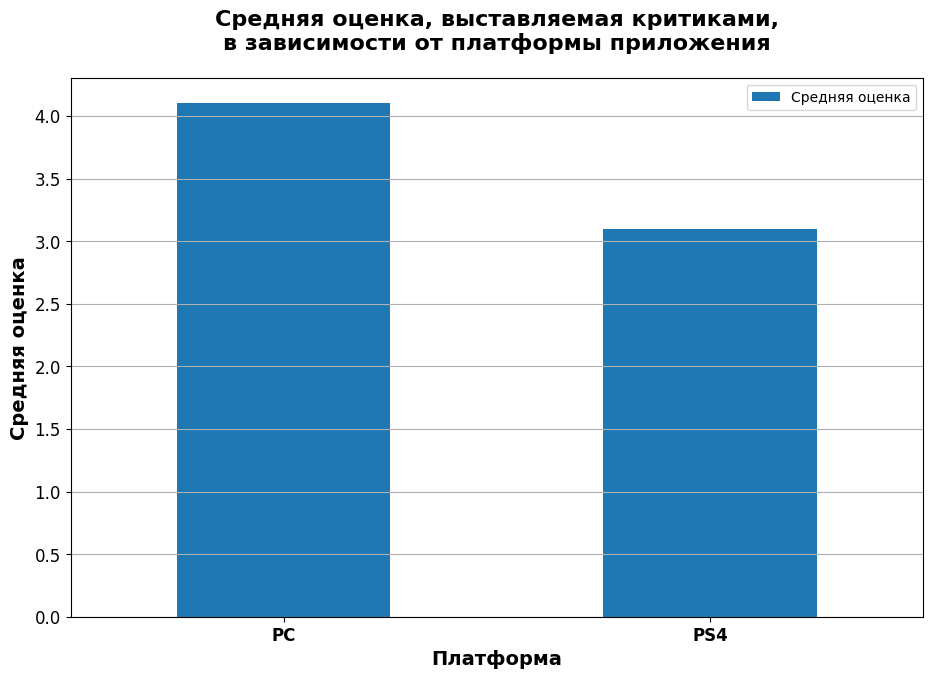

In [15]:
# Визуализируем наши показатели:
# ----------------------------------------------------------------------------
# Visualize our indicators:

platform_group.plot(kind='bar')
plt.grid(axis='y')
plt.title('Средняя оценка, выставляемая критиками,' '\n'
          'в зависимости от платформы приложения',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Платформа',fontsize=14, fontweight='bold')
plt.ylabel('Средняя оценка', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=0)
plt.yticks(np.arange(0, 4.5, 0.5), fontsize=12)
plt.show()

**Сформулируем наши гипотезы:**  
**H0:** среднее значение оценки, выставляемой критиками  
играм на PC платформе, равно средней оценке по играм на PS4 платформе.  
**H1:** среднее значение оценки, выставляемой критиками  
играм на PC платформе, отличается от средней оценки по играм на PS4 платформе.


---
**Let's formulate our hypotheses:**  
**H0:** the average rating given by critics  
to games on the PC platform is equal to the average rating for games on the PS4 platform.  
**H1:** the average rating given by critics  
to games on the PC platform differs from the average rating for games on the PS4 platform.

In [16]:
# Проведем двухвыборочный T-тест. Сравним значение средней оценки, выставляемой
# критиками играм на PC платформе, со средним значением выставляемой критиками
# оценки по играм на PS4 платформе.
# Примем пороговый уровень статистической значимости равный 0.05.
# ----------------------------------------------------------------------------
# Let's do a two-sample T-test. Let's compare the value of the average rating
# given critically acclaimed games on the PC platform, with an average value
# exposed by critics ratings for games on the PS4 platform.
# Let's assume a threshold level of statistical significance equal to 0.05.

stat, p_value = stats.ttest_ind(
    (platform.loc[(df['Платформа'] == 'PC'), ['Средняя оценка']]),
    (platform.loc[(df['Платформа'] == 'PS4'), ['Средняя оценка']]),
    equal_var=False
    )
print('Статистика = %.2f, p_value = %.3f.' % (stat, p_value))

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу. Вероятно, выставляемая критиками '
          'средняя оценка' '\n' 'играм на PC платформе, равна средней оценке '
          'по играм на PS4 платформе.')
else:
    print('Отклоняем нулевую гипотезу. Вероятно, среднее значение оценки, '
          'выставляемой' '\n' 'критиками играм на PC платформе, отличается '
          'от средней оценки по играм' '\n' 'на PS4 платформе.')

Статистика = 4.45, p_value = 0.000.
Отклоняем нулевую гипотезу. Вероятно, среднее значение оценки, выставляемой
критиками играм на PC платформе, отличается от средней оценки по играм
на PS4 платформе.


*Результаты теста говорят нам, что средняя оценка, выставляемая критиками играм  
на PC платформе, отличается от средней оценки по играм на PS4 платформе. При этом  
показатель t-статистики показывает, что средняя оценка по играм на PC платформе  
выше, чем средняя оценка по играм на PS4 платформе.*


---
*The test results tell us that the average score given by critics to games  
on the PC platform, it differs from the average rating for games on the PS4  
platform. At the same time the t-statistics indicator shows that the average  
score for games on the PC platform higher than the average score for games on  
the PS4 platform.*

###**Критикам больше нравятся стрелялки или стратегии?**


---
###**Do critics like shooting games or strategies more?**

In [17]:
# Отфильтруем наш датасет по интересующим нас показателям:
# ----------------------------------------------------------------------------
# Let's filter our dataset by the indicators we are interested in:

genre = (
    df.loc[(df['Жанр'] == 'Shooter') | (df['Жанр'] == 'Strategy'),
           ['Жанр', 'Средняя оценка']]
           )
genre.head()

,Жанр,Средняя оценка
29,Shooter,1.1
32,Shooter,1.0
34,Shooter,4.0
35,Shooter,1.1
36,Shooter,0.9


In [18]:
# Сгруппируем наши показатели по жанру и средней оценке:
# -----------------------------------------------------------------------------
# Let's group our indicators by genre and average rating:

genre_group = genre[['Жанр', 'Средняя оценка']].groupby('Жанр').mean().round(1)
genre_group.head()

,Средняя оценка
Жанр,
Shooter,3.0
Strategy,3.9


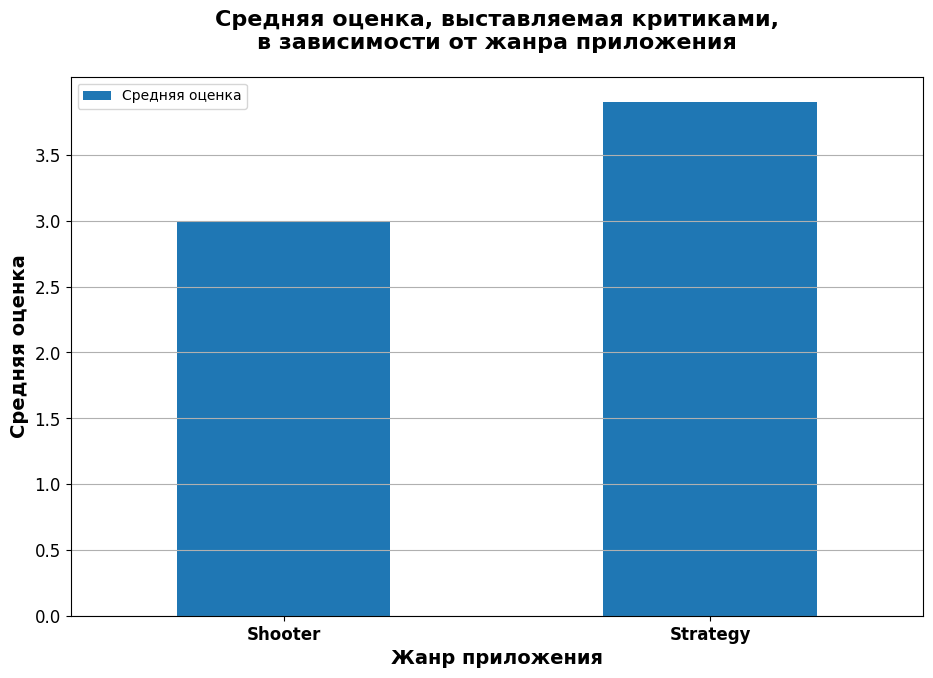

In [19]:
# Визуализируем наши показатели:
# ----------------------------------------------------------------------------
# Visualize our indicators:

genre_group.plot(kind='bar')
plt.grid(axis='y')
plt.title('Средняя оценка, выставляемая критиками,' '\n'
          'в зависимости от жанра приложения',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Жанр приложения',fontsize=14, fontweight='bold')
plt.ylabel('Средняя оценка', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=0)
plt.yticks(np.arange(0, 4.0, 0.5), fontsize=12)
plt.show()

**Сформулируем наши гипотезы:**  
**H0:** среднее значение оценки, выставляемой критиками  
стрелялкам, равно средней оценке по стратегиям.  
**H1:** среднее значение оценки, выставляемой критиками  
стрелялкам, отличается от средней оценки по стратегиям.


---
**Let's formulate our hypotheses:**  
**H0:** the average score given by critics  
to shooting games is equal to the average score for strategies.  
**H1:** the average score given by critics  
to shooting games differs from the average score for strategies.

In [20]:
# Проведем двухвыборочный T-тест. Сравним значение средней оценки, выставляемой
# критиками стрелялкам, со средним значением выставляемой критиками оценки по
# стратегиям.
# Примем пороговый уровень статистической значимости равный 0.05.
# ----------------------------------------------------------------------------
# Let's do a two-sample T-test. Let's compare the value of the average rating
# given critically acclaimed shooting games, with the average value of the
# critically acclaimed score on strategies.
# Let's assume a threshold level of statistical significance equal to 0.05.

stat, p_value = stats.ttest_ind(
    (genre.loc[(genre['Жанр'] == 'Shooter'), ['Средняя оценка']]),
    (genre.loc[(genre['Жанр'] == 'Strategy'), ['Средняя оценка']]),
    equal_var=False
    )
print('Статистика = %.2f, p_value = %.3f.' % (stat, p_value))

if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу. Вероятно, выставляемая критиками '
          'средняя оценка' '\n' 'стрелялкам, равна средней оценке по '
          'стратегиям.')
else:
    print('Отклоняем нулевую гипотезу. Вероятно, среднее значение оценки, '
          'выставляемой' '\n' 'критиками стрелялкам, отличается от средней '
          'оценки по стратегиям.')

Статистика = -4.72, p_value = 0.000.
Отклоняем нулевую гипотезу. Вероятно, среднее значение оценки, выставляемой
критиками стрелялкам, отличается от средней оценки по стратегиям.


*Результаты теста говорят нам, что средняя оценка, выставляемая критиками стрелялкам,  
отличается от средней оценки по стратегиям. При этом показатель t-статистики показывает,  
что средняя оценка по стрелялкам ниже, чем средняя оценка по стратегиям.*


---
*The test results tell us that the average score given by critics to shooting  
games differs from the average score for strategies. At the same time, the t-statistics indicator  
shows, that the average score for shooting games is lower than the average score for strategies.*